# 파이썬을 활용한 AI 딥러닝 1팀 !
- 20163834 기계공학부 김상우
- 20160648 기계공학부 홍정기
 
# 데이터
## 주제 : 숨겨진 글자 분류


## 데이터 확인 과정


### 데이터 다운로드

깃허브에 있는 파일 다운로드

In [1]:
!git clone https://github.com/qq8721443/hidden-number.git

Cloning into 'hidden-number'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


압축 풀기

In [2]:
!mkdir ./hidden_number
!unzip ./hidden-number/hidden_number.zip -d ./hidden_number

Archive:  ./hidden-number/hidden_number.zip
  inflating: ./hidden_number/submission.csv  
  inflating: ./hidden_number/test.csv  
  inflating: ./hidden_number/train.csv  


### 데이터 확인

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


train_data = pd.read_csv('./hidden_number/train.csv')
train_letter = train_data['letter'].values
train_digit = train_data['digit'].values
train_img = train_data.iloc[:, 3:].values.reshape(-1, 28, 28, 1).astype(np.int)

print(train_letter)
print(f'문자열 확인 {np.unique(train_letter)}')
print(f'숫자 확인 {np.unique(train_digit)}')

test_data = pd.read_csv('./hidden_number/test.csv')
test_letter = test_data['letter'].values
test_img = test_data.iloc[:, 2:].values.reshape(-1, 28, 28, 1).astype(np.int)

print(test_letter)
print(f'문자열 확인 {np.unique(test_letter)}')

['L' 'B' 'L' ... 'A' 'Z' 'Z']
문자열 확인 ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
숫자 확인 [0 1 2 3 4 5 6 7 8 9]
['L' 'C' 'S' ... 'B' 'K' 'S']
문자열 확인 ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


 이미지 확인


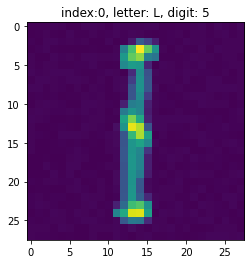

In [22]:
plt.title(f"index:0, letter: {train_letter[0]}, digit: {train_digit[0]}")
plt.imshow(train_img[0].reshape(28, 28))
plt.show()

train data의 0번째 이미지를 확인했을 때 위와 같은 모양을 확인함.
전체 모양은 알파벳을 나타내고 알파벳 내부의 밝은 부분이 숫자인 것 같음.

숫자와 문자 부분을 더욱 뚜렷하게 확인하기 위해 cmap='bwr'을 사용함.


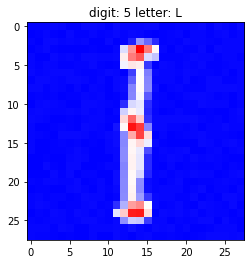

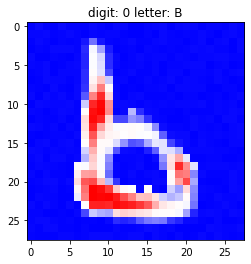

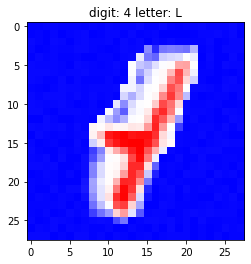

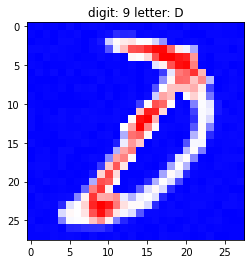

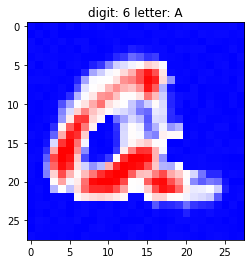

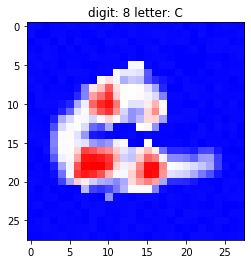

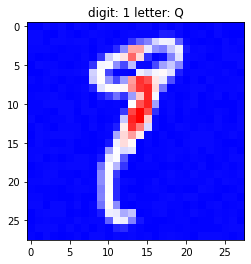

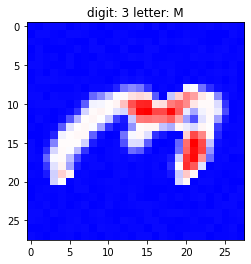

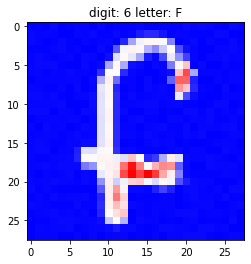

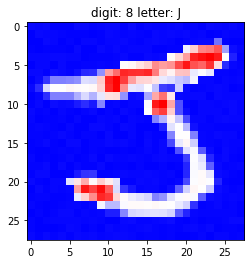

In [5]:
for i in range(10):
  plt.title(f"digit: {train_digit[i]} letter: {train_letter[i]}")
  plt.imshow(train_img[i].reshape(28,28), cmap='bwr')
  plt.show()

## 모델 학습

### 데이터 전처리

In [6]:
train_img = train_img/255 # 데이터 정규화

y = np.zeros((len(train_digit), len(np.unique(train_digit))))
for i, v in enumerate(train_digit):
  y[i, v] = 1 # 원 핫 인코딩

print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 모델링

In [26]:

import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import cv2
import gc

train_224=np.zeros([2048,100,100,3],dtype=np.float32)

# 3 채널로 변경
for i, v in enumerate(train_img):
  converted = cv2.cvtColor(v.astype('float32'), cv2.COLOR_GRAY2RGB)
  resized = cv2.resize(converted, (100, 100), interpolation=cv2.INTER_CUBIC)
  del converted
  train_224[i] = resized
  del resized

In [31]:
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback, EarlyStopping

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=50)

In [25]:

# 모델링 하는 코드 적기
effnet = tf.keras.applications.EfficientNetB3(
    include_top=True, # include_top=False만 해봐서 True값으로 해봄
    weights=None,
    input_shape=(100,100,3),
    classes=10,
    classifier_activation="softmax",
)
model = Sequential()
model.add(effnet)
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 10)                10798905  
Total params: 10,798,905
Trainable params: 10,711,602
Non-trainable params: 87,303
_________________________________________________________________


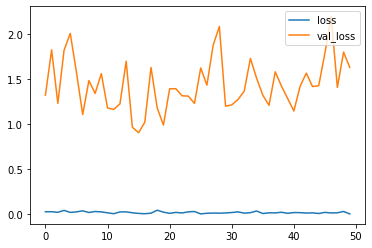

loss =  0.0011460481910035014 , val_loss =  1.6282066106796265
Epoch 51/150
56/58 [===========================>..] - ETA: 0s - loss: 0.0129 - accuracy: 0.9967

KeyboardInterrupt: ignored

In [32]:
model.fit(train_224, y, epochs=150,
          shuffle=True,
          validation_split=0.1,
          callbacks=[plot_losses, early_stopping]
)

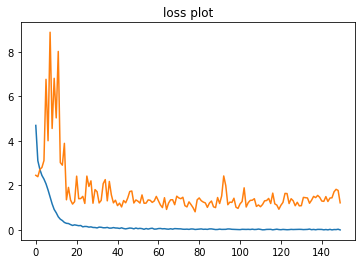

In [28]:
plt.title("loss plot")
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.show()

In [17]:
test_224=np.zeros([20480,100,100,3],dtype=np.float32)

# 3 채널로 변경
for i, v in enumerate(y):
  converted = cv2.cvtColor(v.astype('float32'), cv2.COLOR_GRAY2RGB)
  resized = cv2.resize(converted, (100, 100), interpolation=cv2.INTER_CUBIC)
  del converted
  test_224[i] = resized
  del resized

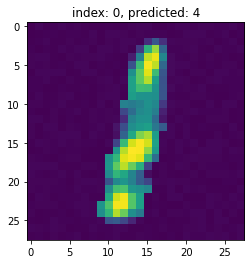

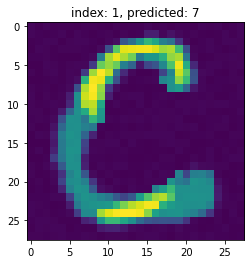

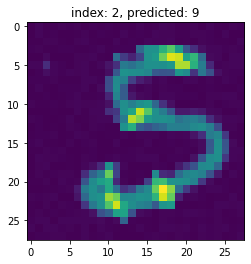

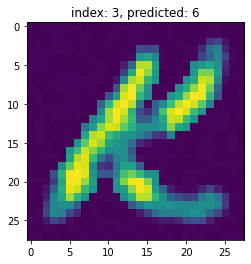

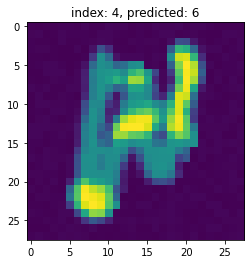

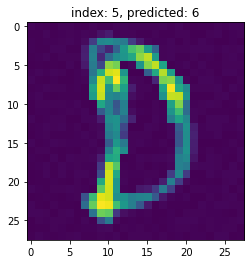

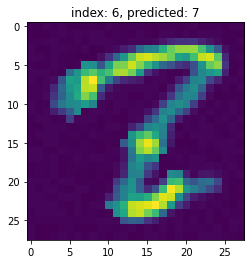

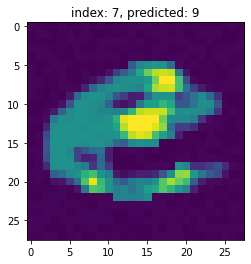

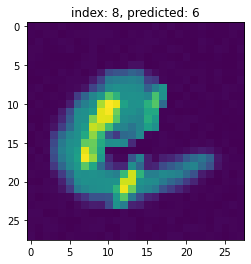

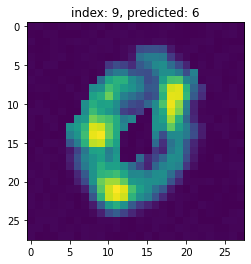

In [29]:
final = model.predict(test_224)
predicted = np.argmax(final, axis=-1)
for i in range(10):
  plt.title(f'index: {i}, predicted: {predicted[i]}')
  plt.imshow(test_img[i].reshape(28, 28))
  plt.show()

## 성능 향상 방법

### 이미지 통째로 학습시키는거 말고 밝은 숫자부분만 추출해 사용

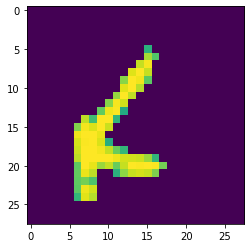

In [86]:
test_img = train_img[333]
test_img = np.where(test_img > 155, test_img, 0)
plt.imshow(test_img.reshape(28, 28))
plt.show()

separate_img = np.where(train_img > 155, train_img, 0)
for i in range(10):
  plt.imshow(separate_img[i])

### 이미지 증강

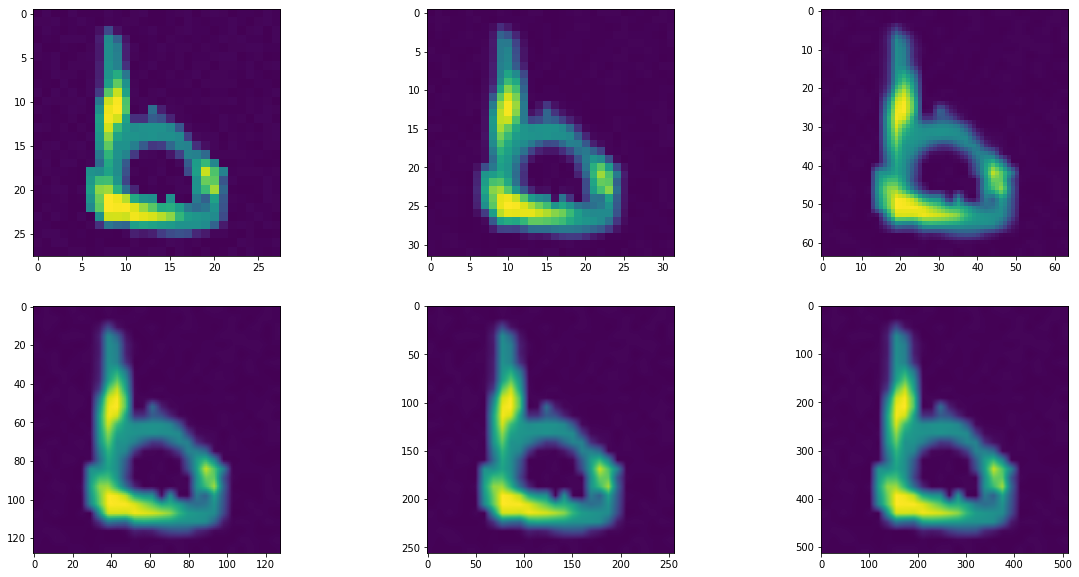

In [65]:
origin_img = train_img[1]
augment_img_32 = tf.keras.layers.experimental.preprocessing.Resizing(32, 32)(origin_img.reshape(28, 28, 1))
augment_img_64 = tf.keras.layers.experimental.preprocessing.Resizing(64, 64)(origin_img.reshape(28, 28, 1))
augment_img_128 = tf.keras.layers.experimental.preprocessing.Resizing(128, 128)(origin_img.reshape(28, 28, 1))
augment_img_256 = tf.keras.layers.experimental.preprocessing.Resizing(256, 256)(origin_img.reshape(28, 28, 1))
augment_img_512 = tf.keras.layers.experimental.preprocessing.Resizing(512, 512)(origin_img.reshape(28, 28, 1))

plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(tf.squeeze(origin_img))

plt.subplot(2, 3, 2)
plt.imshow(tf.squeeze(augment_img_32))

plt.subplot(2, 3, 3)
plt.imshow(tf.squeeze(augment_img_64))

plt.subplot(2, 3, 4)
plt.imshow(tf.squeeze(augment_img_128))

plt.subplot(2, 3, 5)
plt.imshow(tf.squeeze(augment_img_256))

plt.subplot(2, 3, 6)
plt.imshow(tf.squeeze(augment_img_512))

plt.show()


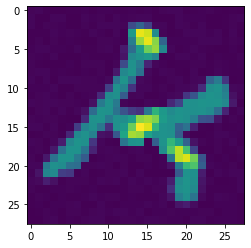

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


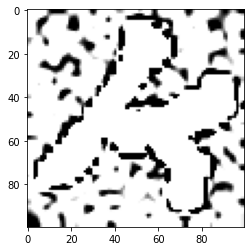

In [108]:
# 궁금한 점 ! 왜 3차원으로 바꿨는데 이미지 출력하니까 저런식으로 나오는건지? 이렇게 되면 알파벳 안에 있는 숫자 데이터는 사라지는건지?

import cv2


plt.imshow(train_img[113].reshape(28, 28))
plt.show()


converted = cv2.cvtColor(train_img[113].astype('float32'), cv2.COLOR_GRAY2RGB)
resized = cv2.resize(converted, (300, 300), interpolation=cv2.INTER_CUBIC)

plt.imshow(resized)
plt.show()